In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D

from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import glob

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
from random import random
from PIL import Image
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Lisa\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

In [4]:
path = "C:/Users/Lisa/Rezanur/Updated SCI/Uni/GT_IDS/Federated Data/Wavelet_out/"

In [5]:
Concat_Spec = pd.read_csv(path + "Wavelet_Mul_Full_df_train.csv")
Concat_Spec.shape

(4692, 172)

In [6]:
ss = Concat_Spec.shape[1]

In [7]:
Final = np.array(Concat_Spec)
Final = Final[:120300]
print(Final.shape)

(4692, 172)


In [8]:
"""Final = Final.reshape(-1,100,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]
print('Old:', Final.shape)
Final = Final.reshape(120300, ss)
print('Updated:',Final.shape)"""

"Final = Final.reshape(-1,100,Final.shape[1])\nshuffle_idx = np.random.permutation(Final.shape[0])\nFinal = Final[shuffle_idx]\nprint('Old:', Final.shape)\nFinal = Final.reshape(120300, ss)\nprint('Updated:',Final.shape)"

In [9]:
X = Final[:, :ss-1]
y = Final[:,ss-1]

In [10]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X.shape)
print(y.shape)

(4692, 171)
(4692,)


In [11]:
pd.value_counts(y)

0.0    1800
3.0    1500
1.0     708
2.0     684
dtype: int64

In [12]:
len(Final)

4692

In [13]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp])
    y_trainX.append(y[timestamp])
    
    if timestamp >= length-10:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

4673
4673


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size=0.20, random_state=0)

In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
pd.value_counts(y_train)

0.0    1423
3.0    1206
1.0     570
2.0     539
dtype: int64

In [17]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [18]:
print(y_train[0])
print(y_test[64])

[1. 0. 0. 0.]
[0. 0. 0. 1.]


In [19]:
print(X_train.shape)

(3738, 10, 171)


In [20]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 10, ss-1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 10, ss-1, 1))

In [21]:
print(X_train[0])
print('\n')
print(y_train[0])

[[[0.01007087]
  [0.03331867]
  [0.01605299]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]

 [[0.01007511]
  [0.03331129]
  [0.01605787]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]

 [[0.01008019]
  [0.03330455]
  [0.01606395]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]

 ...

 [[0.01002028]
  [0.0333755 ]
  [0.01597907]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]

 [[0.010203  ]
  [0.03308616]
  [0.01610552]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]

 [[0.01004343]
  [0.03326793]
  [0.01596562]
  ...
  [0.4459145 ]
  [0.22092854]
  [0.49470761]]]


[1. 0. 0. 0.]


In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='ReLU',padding='same',input_shape=(10, ss-1, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='ReLU',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='ReLU',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='ReLU'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 171, 32)       320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 171, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 86, 32)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 86, 32)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 86, 64)         18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5, 86, 64)         0         
                                                        

In [23]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="Wavelet_Multi_CNN.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [24]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/150
59/59 [==============================] - 3s 15ms/step - loss: 1.0588 - acc: 0.5308 - val_loss: 0.7880 - val_acc: 0.6663
Epoch 2/150
59/59 [==============================] - 1s 9ms/step - loss: 0.6199 - acc: 0.7311 - val_loss: 0.4813 - val_acc: 0.8406
Epoch 3/150
59/59 [==============================] - 1s 9ms/step - loss: 0.4008 - acc: 0.8384 - val_loss: 0.2938 - val_acc: 0.8909
Epoch 4/150
59/59 [==============================] - 1s 9ms/step - loss: 0.2628 - acc: 0.8978 - val_loss: 0.2112 - val_acc: 0.8813
Epoch 5/150
59/59 [==============================] - 1s 9ms/step - loss: 0.1752 - acc: 0.9296 - val_loss: 0.1828 - val_acc: 0.8791
Epoch 6/150
59/59 [==============================] - 1s 9ms/step - loss: 0.1317 - acc: 0.9513 - val_loss: 0.0791 - val_acc: 0.9733
Epoch 7/150
59/59 [==============================] - 1s 9ms/step - loss: 0.0959 - acc: 0.9698 - val_loss: 0.0609 - val_acc: 0.9733
Epoch 8/150
59/59 [==============================] - 1s 9ms/step - loss: 0.0747 - 

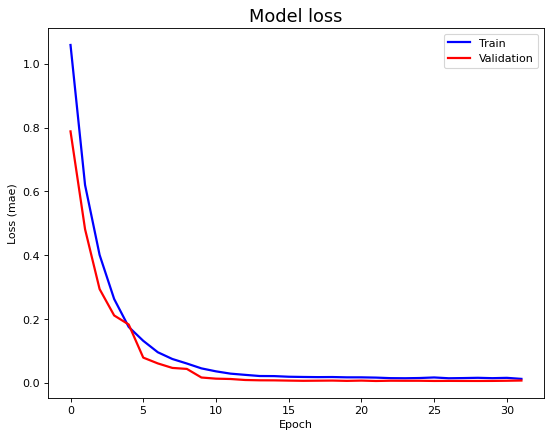

In [25]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [26]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('Wavelet_Multi_CNN.h5')

In [27]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [28]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[367   0   0   0]
 [  0 138   0   0]
 [  0   1 144   0]
 [  0   0   0 285]]


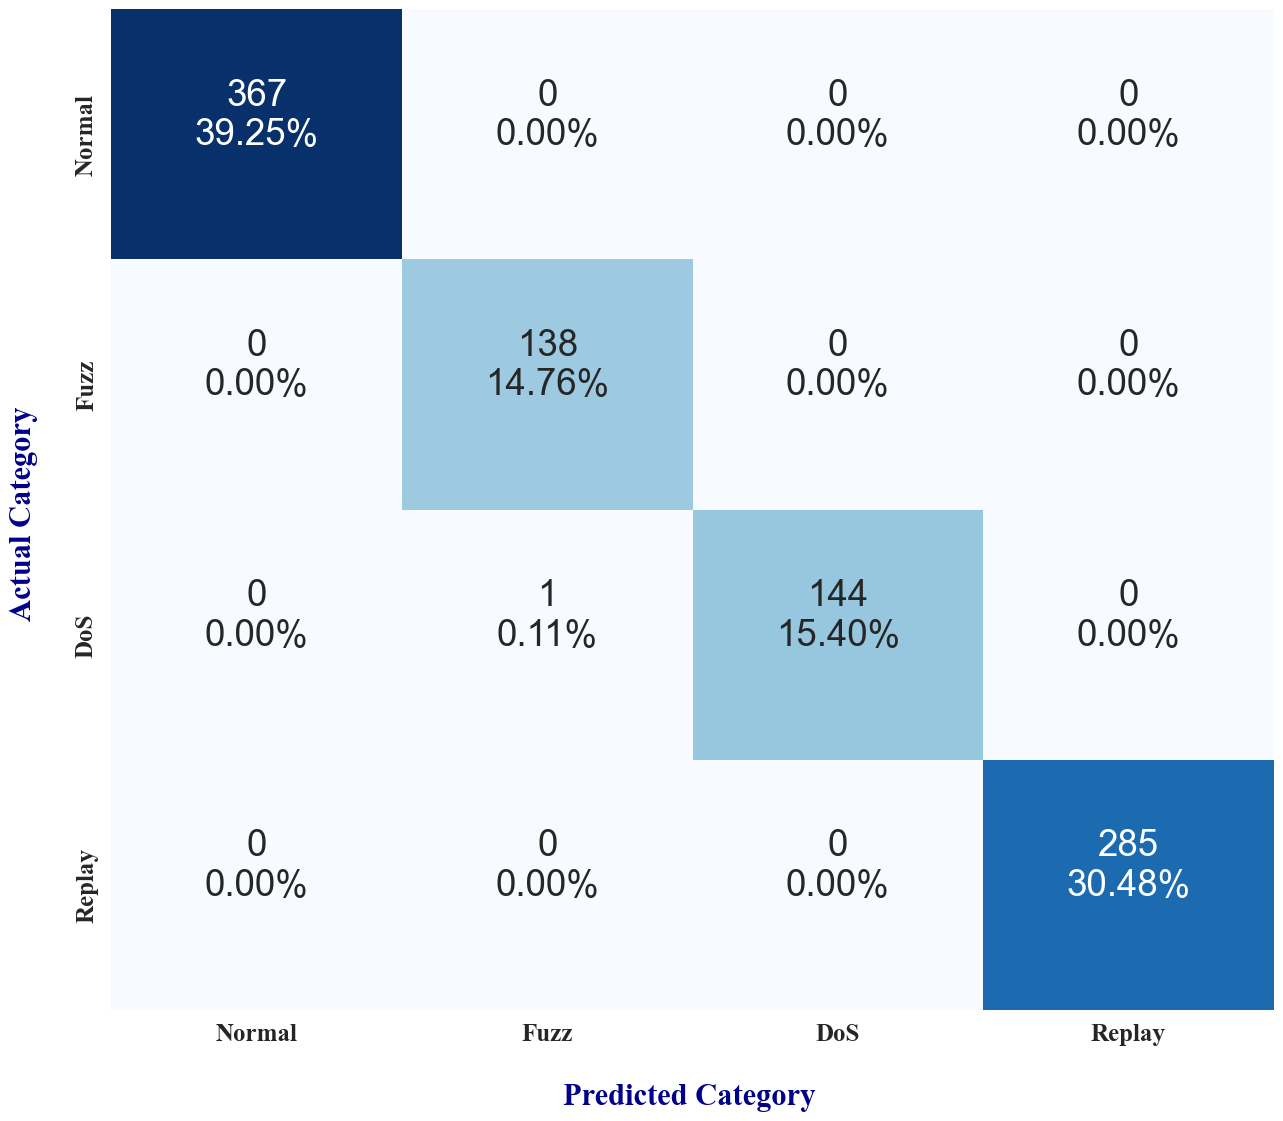

In [29]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(15,13)})
sns.set(font_scale=2.2) #edited as suggested
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)


ax.set_xlabel('\nPredicted Category ', fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Actual Category \n', fontname="Times New Roman", size=22,fontweight="bold");
#ax.text(0.40, 4.65, '(b) Confusion Matrix GRU Multiclass Classification',fontsize=25,fontweight="bold")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.yaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')
## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
from sklearn.metrics import classification_report
class_names = ["Normal", "Fuzz", "DoS", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       367
        Fuzz       0.99      1.00      1.00       138
         DoS       1.00      0.99      1.00       145
      Replay       1.00      1.00      1.00       285

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



ROC AUC score: 0.9989810928914464


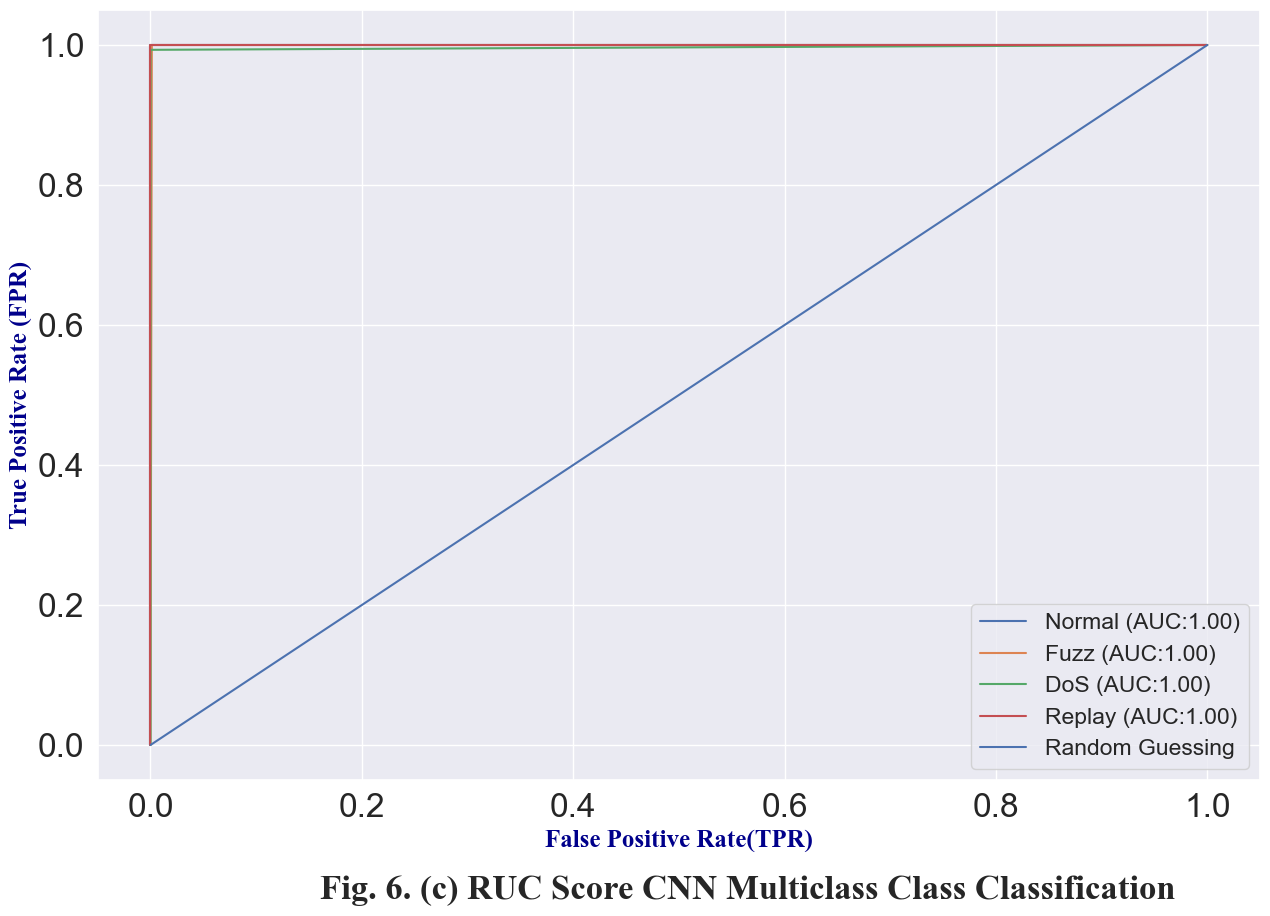

In [31]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "Fuzz", "DoS", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (15, 10))
sns.set(font_scale=1.5) #edited as suggested

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.set_xlabel('False Positive Rate(TPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.set_ylabel('True Positive Rate (FPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.text(0.16, -0.22, 'Fig. 6. (c) RUC Score CNN Multiclass Class Classification', fontname="Times New Roman",fontsize=25,fontweight="bold")
c_ax.legend(loc="lower right")

In [32]:
Tesla_Normal_Spec = pd.read_csv(path + "Wavelet_Multi_Full_df_test.csv")
Tesla_Normal_Spec.shape

(3096, 172)

In [33]:
tesla = np.array(Tesla_Normal_Spec)

In [34]:
X = tesla[:, :ss-1]
y = tesla[:,ss-1]

In [35]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(3096, 171)

In [36]:
X_test = []
y_test = []
strat_time = 0
timestamp = 10
length = len(tesla)

for i in range(length):
    X_test.append(X[strat_time:timestamp])
    y_test.append(y[timestamp])
    
    if timestamp >= length-10:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_test))
print(len(y_test))

3077
3077


In [37]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
#Resape data into 3 dimention
X_test = np.reshape(X_test, (X_test.shape[0], 10, ss-1, 1))

In [39]:
y_test = to_categorical(y_test, 4)
y_test[0]

array([1., 0., 0., 0.], dtype=float32)

In [40]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model_x = load_model('Wavelet_Multi_CNN.h5')

In [41]:
#Prediction
pred_x = model_x.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [42]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred_x, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[1790    0    0    0]
 [   1   51  512    0]
 [   0    1  539    0]
 [  30    0    1  152]]


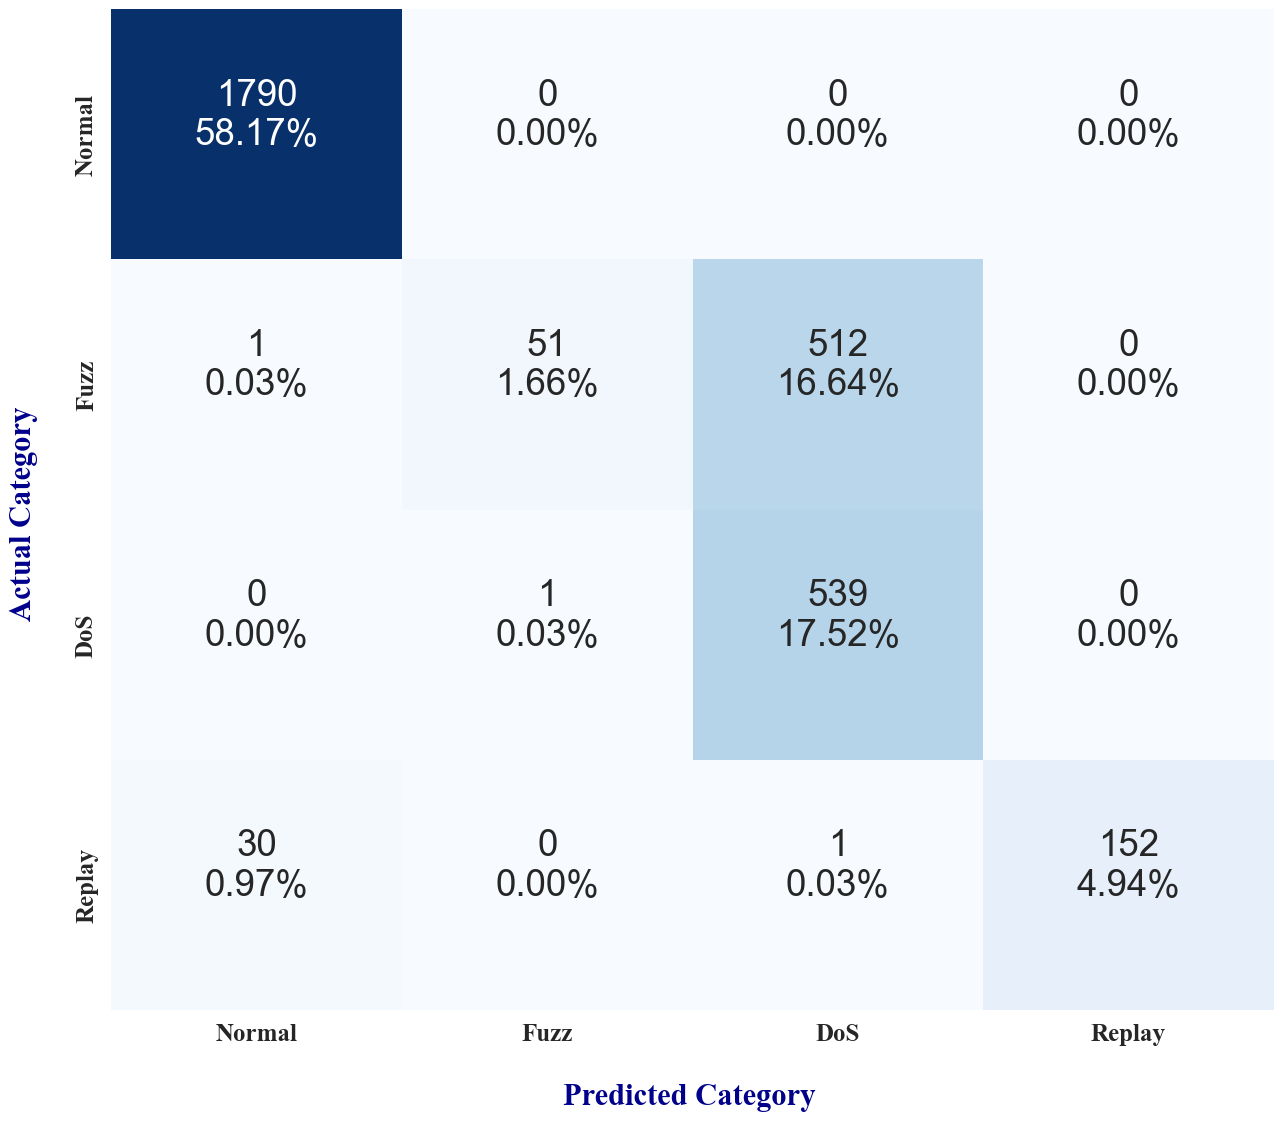

In [43]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(15,13)})
sns.set(font_scale=2.2) #edited as suggested
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)


ax.set_xlabel('\nPredicted Category ', fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Actual Category \n', fontname="Times New Roman", size=22,fontweight="bold");
#ax.text(0.40, 4.65, '(b) Confusion Matrix GRU Multiclass Classification',fontsize=25,fontweight="bold")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.yaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')
## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
from sklearn.metrics import classification_report
class_names = ["Normal", "Fuzz", "DoS", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      1790
        Fuzz       0.98      0.09      0.17       564
         DoS       0.51      1.00      0.68       540
      Replay       1.00      0.83      0.91       183

    accuracy                           0.82      3077
   macro avg       0.87      0.73      0.69      3077
weighted avg       0.90      0.82      0.78      3077



ROC AUC score: 0.8365603108272818


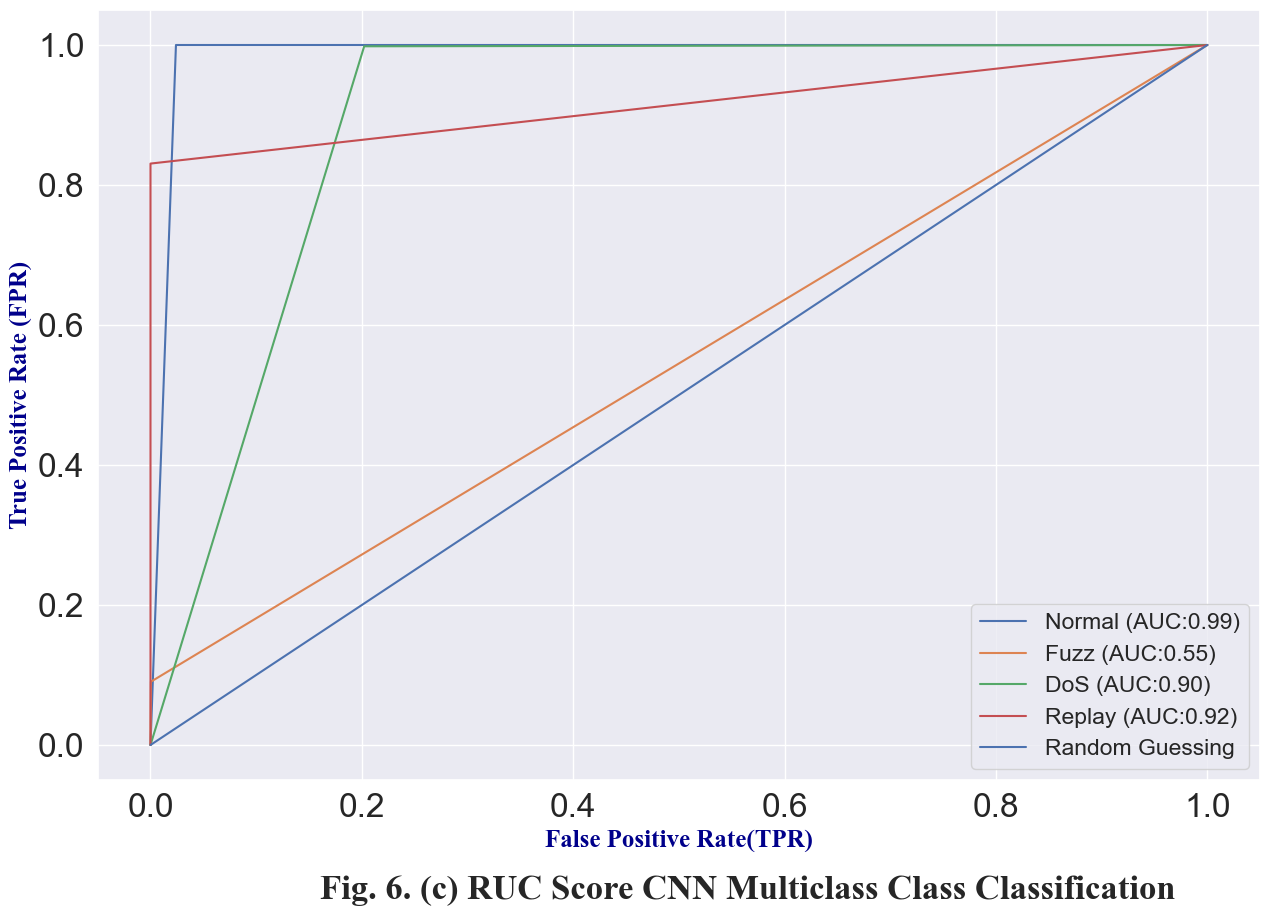

In [45]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "Fuzz", "DoS", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (15, 10))
sns.set(font_scale=1.5) #edited as suggested

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.set_xlabel('False Positive Rate(TPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.set_ylabel('True Positive Rate (FPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.text(0.16, -0.22, 'Fig. 6. (c) RUC Score CNN Multiclass Class Classification', fontname="Times New Roman",fontsize=25,fontweight="bold")
c_ax.legend(loc="lower right")